# Low level Neural Network Functions
- Convolution filter (5 points)
- Rectified linear - ReLu (2 points) 
- Max pooling (3 points)
- Normalisation (2 points)
- Fully-connected layer (5 points)
- Softmax (2points)

In [ ]:
## import libraries
#Importing Libraries
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import plot_model

## Getting the data an selecting one image for testing

In [ ]:
#Getting The Mnist image data
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

In [ ]:
#Getting The CIFAR10 image data
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) =  keras.datasets.cifar10.load_data()

In [ ]:
#function that just selects one image and then convert the image values to be between 0 and 1
def data_preprocessing(x_train):
  return x_train[195]/255

In [ ]:
image_mnist = data_preprocessing(x_train_mnist)

In [ ]:
image_cifar = data_preprocessing(x_train_cifar)

In [ ]:
print("The shape of the Mnist image is {} and shape of the CIFAR10 image is {}".format(image_mnist.shape, image_cifar.shape))

The shape of the Mnist image is (28, 28) and shape of the CIFAR10 image is (32, 32, 3)


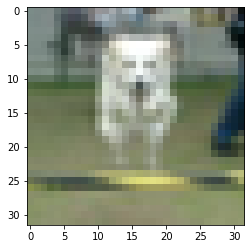

In [ ]:
plt.imshow(image_cifar)

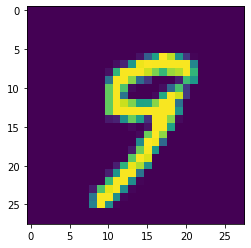

In [ ]:
plt.imshow(image_mnist)

In [ ]:
# Cifar with code 5 is a dog
y_train_cifar[195]

array([5], dtype=uint8)

## Convolution filter function

In [ ]:
def conv2d(input_layer, filters):

    # Dimensions of the input layer
    input_shape = input_layer.shape
    # Number of channels in the input layer
    input_channels = input_shape[-1]

    # Dimensions of the filter
    
    filter_shape = filters.shape[:2]

    # Number of filters
    num_filters = filters.shape[-1]
    # Height and width of the filter
    filter_height, filter_width = filter_shape[:2]

    # Compute the output shape
    output_height = input_shape[0] - filter_height + 1
    output_width = input_shape[1] - filter_width + 1
    if output_height <= 0 or output_width <= 0:
        raise ValueError("Please choose a valid filter shape")

    # Initialize the output layer
    filter_map = np.zeros((output_height, output_width, num_filters))

    # Iterate over each filter
    for f in range(num_filters):
        # Iterate over each pixel in the output layer
        for i in range(output_height):
            for j in range(output_width):
                # Extract the current window of the input layer
                window = input_layer[i:i+filter_shape[0], j:j+filter_shape[1], :]
                # Compute the dot product between the window and the filter
                filter_map[i, j, f] = np.sum(window * filters[:, :, :, f])
  
    # Return the filter map
    return filter_map


In [ ]:
#Verticale edges
kernel1 = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

#Horizontal edges
kernel2 = np.array([[-1, -1, -1],
                   [ 0,  0,  0],
                   [ 1,  1,  1]])
#each filter should have a third dimension of corresponding size
kernel1 = kernel1[:, :, np.newaxis]
kernel2 = kernel2[:, :, np.newaxis]

list_kernels = [kernel1, kernel2]

#Stack the filters
stacked_filters = np.stack(list_kernels, axis=-1)
print("The shape of the kernel is {}".format(stacked_filters.shape))

The shape of the kernel is (3, 3, 1, 2)


In [ ]:
# Apply the convolution to CIFAR10 image, which is 32x32x3
print("The input shape of the CIFAR10 dataset {}".format(image_cifar.shape))
filtermap_cifar = conv2d(image_cifar, stacked_filters)


# Apply the convolution to MNIST image, which is 28x28

# The input layer should have a third dimension, representing a stack of feature maps. For MNIST We don't have 3 dimensions, so we include it
image_mnist3d = image_mnist[:, :, np.newaxis]
print("Input shape of MNIST dataset {}".format(image_mnist3d.shape))

filtermap_mnist = conv2d(image_mnist3d, stacked_filters)

The input shape of the CIFAR10 dataset (32, 32, 3)
Input shape of MNIST dataset (28, 28, 1)


In [ ]:
# Printing and plotting results after cov2d function
print("Result after convolutional filter on the mnist dataset {}".format(filtermap_mnist.shape))
print("Result after convolutional filter on the cifar dataset {}".format(filtermap_cifar.shape))

Result after convolutional filter on the mnist dataset (26, 26, 2)
Result after convolutional filter on the cifar dataset (30, 30, 2)


In [ ]:
def plot_filtermap(filtermap, name_filter = {0: "Verticale", 1: "Horizontal"}):

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
    
    for i in range(filtermap.shape[-1]):
        # Plot the filter map
        axs[i].imshow(filtermap[:, :, i], cmap='gray')
        axs[i].set_title(f'{name_filter[i]} Filter')
        axs[i].set_xlabel('Width')
        axs[i].set_ylabel('Height')
        
    
    plt.show()


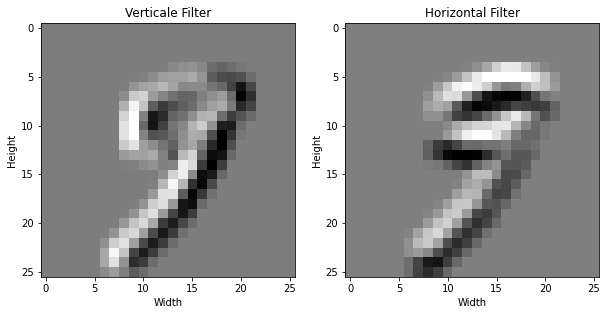

In [ ]:
plot_filtermap(filtermap_mnist, name_filter = {0: "Verticale", 1: "Horizontal"})

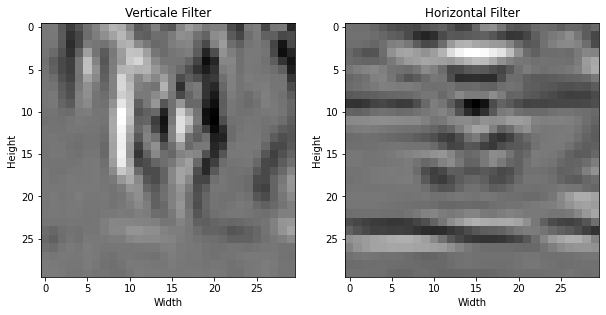

In [ ]:
plot_filtermap(filtermap_cifar, name_filter = {0: "Verticale", 1: "Horizontal"})

## Rectified linear - ReLu function

In [ ]:
def relu_activation(filter_map):
  #Threshold/rectification operation Y = f(X) = max(0, X) 
  result = np.maximum(filter_map, 0) 
  return result

In [ ]:
# Testing the Relu function

relu_mnist = relu_activation(filtermap_mnist)
relu_cifar = relu_activation(filtermap_cifar)

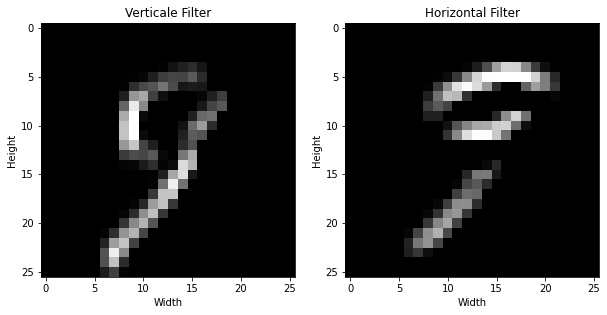

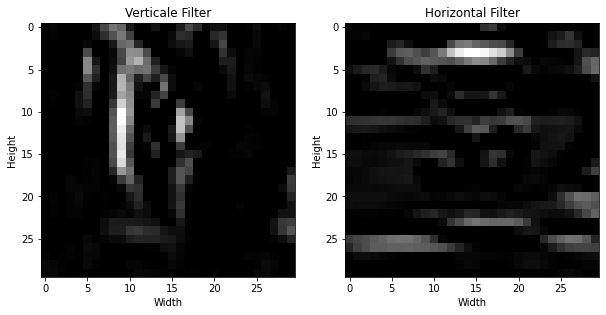

In [ ]:
plot_filtermap(relu_mnist, name_filter = {0: "Verticale", 1: "Horizontal"})
plot_filtermap(relu_cifar, name_filter = {0: "Verticale", 1: "Horizontal"})



```
`# This is formatted as code`
```

## Max pooling function

In [ ]:
def maximum_pool(feature_map, strides=(2, 2),  size_pool=(1, 1)):

    # Get input dimensions
    height, width, depth = feature_map.shape

    #Result dimension

    """
        - The end result would depend on the size of the pool and the strides(step we take to the right and below when moving the pool window).

        - Example if we have A 4x4 matrix filled with rondom numbers (filermap). Suppose we choose a max pool size of 2x2 with a stride of 1, 
          the resulting matrix would be 3x3 matrix:

                              
                              
        - Feature map, input for the maxpool                 | 1 | 2 | 3 | 4 |
                                                             | 5 | 6 | 7 | 8 |
                                                             | 9 | 10| 11| 12|
                                                             | 13| 14| 15| 16|
         
        - After Max maxpool 2x2 with stride 1x1              | 6 | 7 | 8 |
                                                             |10 |11 |12 |
                                                             |14 |15 |16 |
        
        - After Max maxpool 2x2 with stride 2x2 :            | 6 | 8 |
                                                             |14 |16 |
    
    """

    pool_height, pool_width = size_pool
    stride_height, stride_width = strides
    pooled_height = int(np.floor((height - pool_height) / stride_height)) + 1
    pooled_width = int(np.floor((width - pool_width) / stride_width)) + 1

    #Creating the output of the maxpool, filled with zeros
    pooled = np.zeros((pooled_height, pooled_width, depth))

    # Apply max pooling
    for h in range(pooled_height):

        for w in range(pooled_width):

            for d in range(depth):
                # Compute the pooling window

                step_height = h*stride_height
                step_width = w*stride_width

                window = feature_map[step_height:step_height+pool_height, step_width:step_width+pool_width, d]

                # Apply max pooling
                pooled[h, w, d] = np.max(window)

    return pooled

### Testing Maxpool function

The shape of the pooled mnist image is (13, 13, 2)
The shape of the pooled cifar image is (15, 15, 2)


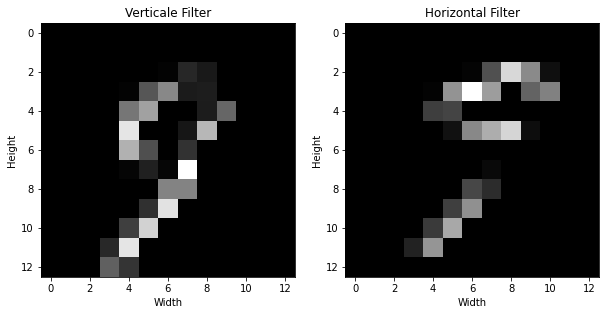

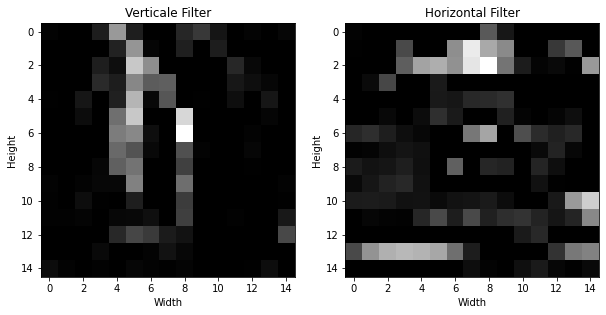

In [ ]:
# Testing the maxpool function
pooled_mnist = maximum_pool(relu_mnist, strides=(2, 2),  size_pool=(1, 1))
pooled_cifar = maximum_pool(relu_cifar, strides=(2, 2),  size_pool=(1, 1))


print("The shape of the pooled mnist image is {}".format(pooled_mnist.shape))
print("The shape of the pooled cifar image is {}".format(pooled_cifar.shape))

# Plot results
plot_filtermap(pooled_mnist, name_filter = {0: "Verticale", 1: "Horizontal"})
plot_filtermap(pooled_cifar, name_filter = {0: "Verticale", 1: "Horizontal"})

## Normalisation function

In [ ]:
def normalize(input):

  #tmp = input-mean(input) then output=tmp/std(input)

  mean_input = np.mean(input, dtype=np.float32)
  std_input = np.std(input, dtype=np.float32)
  
  return (input-mean_input)/std_input

The mean and standard deviation of the normalized mnist image 0.0, 0.9999999546845867 respectively
The mean and standard deviation of the normalized cifar image 0.0, 0.9999999886172681 respectively


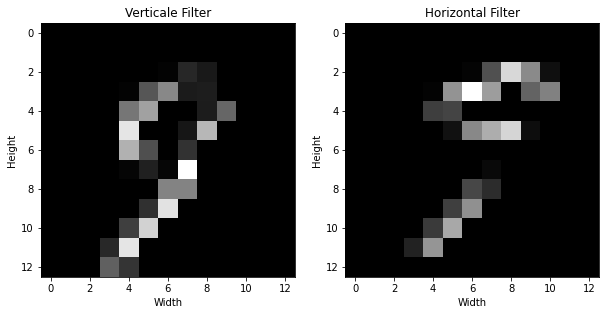

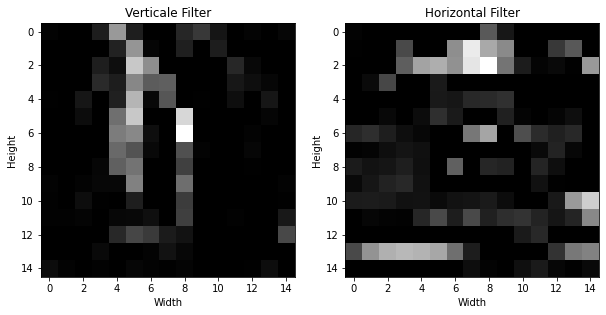

In [ ]:
# Testing the normalization function
normalized_mnist = normalize(pooled_mnist)
normalized_cifar = normalize(pooled_cifar)


print("The mean and standard deviation of the normalized mnist image {}, {} respectively".format(round(np.mean(normalized_mnist), 3), np.std(normalized_mnist)))
print("The mean and standard deviation of the normalized cifar image {}, {} respectively".format(round(np.mean(normalized_cifar), 3), np.std(normalized_cifar)))

# Plot results
plot_filtermap(normalized_mnist, name_filter = {0: "Verticale", 1: "Horizontal"})
plot_filtermap(normalized_cifar, name_filter = {0: "Verticale", 1: "Horizontal"})

## Fully-connected layer function

In [ ]:
def fully_connected_layer(feature_Stacks, n_output_nodes):

    # Begin by flattening this stack of feature maps into a 1-dimensional matrix
    flattened_features = feature_Stacks.flatten()

    # Defining some weights and initializing with zeros
    feature_nodes = flattened_features.shape[0]

    weights = np.random.randn(feature_nodes, n_output_nodes)
    # Multiply the flattened input by the weight matrix
    output = np.dot(flattened_features, weights)

    # Apply the relu_activation defined earlier
    output = relu_activation(output)

    # Return the output array
    return output


In [ ]:
# Testing the fully-connected layer function
connectd_layer_mnist = fully_connected_layer(normalized_mnist, 10)
connectd_layer_cifar = fully_connected_layer(normalized_cifar, 10)


print(connectd_layer_mnist)
print(connectd_layer_cifar)

[0.         0.         0.         2.24705197 0.         0.
 0.         3.55836528 0.         0.        ]
[ 5.45909532  0.          7.86565186 16.07112103  0.          0.
 11.68942834  0.         23.88584488  0.        ]


## Softmax function

In [ ]:
## Softmax function

In [ ]:
def softmax(input):

  """

  This function converts the calculated output from the fully-connected layer into a PROBABILITY that this input image falls into each category.

  """

  exponential  = np.exp(input)

  return np.round(((exponential/(np.sum(exponential)))), 3)

In [ ]:
prob_mnist = softmax(connectd_layer_mnist)
prob_cifar = softmax(connectd_layer_cifar)

In [ ]:
prob_mnist

array([0.019, 0.019, 0.019, 0.18 , 0.019, 0.019, 0.019, 0.668, 0.019,
       0.019])

In [ ]:
label_mnist = {0: 'zero', 1: 'one', 2: 'two', 3: 'three',4: 'four', 5: 'five', 6: 'six', 7: 'seven',8: 'eight', 9: 'nine'}
label_cifar = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [ ]:
pred_value_mnist = np.where(prob_mnist == np.max(prob_mnist))[0][0]
print(label_mnist[pred_value_mnist])

seven


In [ ]:
pred_value_cifar = np.where(prob_cifar == np.max(prob_cifar))[0][0]
print(label_cifar[pred_value_cifar])

ship
